In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import json

In [34]:
#criando o dataframe 
#dados foram extraídos do site https://www.football-data.co.uk/brazil.php onde contem informações de diversos campeonatos ao redor do mundo.
data = pd.read_csv('dados.csv')

In [35]:
#visualizar os dados
display(data.head())

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [5]:
#para modificar as colunas
# data.rename(columns={'Country':'País','League':'Liga','Season':'Temporada','Date':'Data','Time':'Horário','Home':'Casa','Away':'Fora','HG':'Gols Mandante','})

In [36]:
# contabilizar a quantidade de resultados de vitorias, derrotas e empates
data['Res'].value_counts()

H    1677
D     906
A     826
Name: Res, dtype: int64

In [8]:
#descrição estatistica do dataframe
data.describe()

,Season,HG,AG,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
count,3410.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,2015.990616,1.428278,0.945145,2.274582,3.678900,4.741828,2.353056,3.774771,5.005106,2.195575,3.494176,4.352924
std,2.581139,1.164659,0.974550,0.932729,0.649833,2.520689,1.057984,0.678851,2.814410,0.869789,0.557745,2.137282
min,2012.000000,0.000000,0.000000,1.080000,2.540000,1.150000,1.090000,2.630000,0.000000,1.070000,2.510000,1.150000
25%,2014.000000,1.000000,0.000000,1.680000,3.290000,3.000000,1.730000,3.360000,3.100000,1.650000,3.170000,2.870000
50%,2016.000000,1.000000,1.000000,2.060000,3.480000,4.030000,2.130000,3.550000,4.200000,2.020000,3.310000,3.740000
75%,2018.000000,2.000000,1.000000,2.580000,3.880000,5.800000,2.670000,3.990000,6.150000,2.487500,3.660000,5.330000
max,2021.000000,6.000000,6.000000,17.680000,12.250000,29.580000,29.000000,12.500000,36.000000,20.230000,10.820000,26.580000


In [37]:
#excluir todas as linhas que contenha algum dado faltante
data2 = data.dropna()
data2.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [38]:
#verificar o tamanho do dataset
data2.shape

(3409, 19)

In [39]:
#verificar o tamanho do dataset original
data.shape

(3410, 19)

In [40]:
#identifica se existe dados faltantes escrevendo "TRUE" na célula.
enull = data.isnull()
enull.head(100)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
#verifica por coluna quantos dados faltantes existem
dados_faltantes = data.isnull().sum()
print(dados_faltantes)

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         1
AG         1
Res        1
PH         1
PD         1
PA         1
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64


In [42]:
#mostrar dados faltantes em porcentagem
faltante_percentual = (data.isnull().sum()/len(data['Country']))*100
print(faltante_percentual)

Country    0.000000
League     0.000000
Season     0.000000
Date       0.000000
Time       0.000000
Home       0.000000
Away       0.000000
HG         0.029326
AG         0.029326
Res        0.029326
PH         0.029326
PD         0.029326
PA         0.029326
MaxH       0.000000
MaxD       0.000000
MaxA       0.000000
AvgH       0.000000
AvgD       0.000000
AvgA       0.000000
dtype: float64


In [44]:
#Alterando as células com dados faltantes.
data['HG'].fillna(0, inplace=True)
data['AG'].fillna(0, inplace=True)
data['Res'].fillna(0, inplace=True)
data['PH'].fillna(0, inplace=True)
data['PA'].fillna(0, inplace=True)
data['PD'].fillna(0, inplace=True)
data.head(100)
data.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PH         0
PD         0
PA         0
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

In [45]:
#explorando os dados
#Base de dados dos campeonatos de 2012 a 2017
matches = data.shape[0]

features = data.shape[1]

In [46]:
#vitorias em casa
home_win = len(data[data.Res=='H'])

In [47]:
#vitorias do visitante
away_win = len(data[data.Res=='A'])

In [48]:
#empates
draw = len(data[data.Res=='D'])
val=[home_win, away_win, draw]

In [49]:
win_rate = (float(home_win)/(matches))*100

print("Total de jogos: ", matches)
print("Total de colunas: ", features)
print("Total de jogos ganho em casa: ", home_win)
print("Total de jogos ganho pelo visitante: ", away_win)
print("Total de jogos empatados: ", draw)
print('Percentual de jogos ganho em casa: , {:.2f}%'.format(win_rate))

Total de jogos:  3410
Total de colunas:  19
Total de jogos ganho em casa:  1677
Total de jogos ganho pelo visitante:  826
Total de jogos empatados:  906
Percentual de jogos ganho em casa: , 49.18%


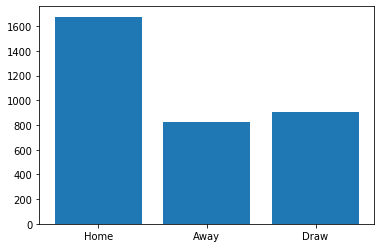

In [50]:
#visualizando os dados
x = np.arange(3)
plt.bar(x,val)
plt.xticks(x,('Home','Away','Draw'))
plt.show()

In [51]:
#Preparando os dados

#Deixar somente as variáveis numéricas
num_data = data.drop(['Country','League','Season','Date','Time','Home','Away'],1)

In [52]:
#visualizar os dados limpos
display(num_data.head())

,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [53]:
#separa as features
features = num_data.drop(['Res'],1)

In [54]:
#separa as labels
labels = num_data['Res']
print('Features')
print(features.head())

print('==========')

print('Labels')
print(labels.head())

Features
    HG   AG    PH    PD    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA
0  1.0  1.0  1.75  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90
1  1.0  1.0  2.83  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58
2  2.0  1.0  1.60  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64
3  4.0  2.0  2.49  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84
4  0.0  1.0  1.96  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89
Labels
0    D
1    D
2    H
3    H
4    A
Name: Res, dtype: object


In [55]:
#Escolhendo as melhores features com kbest

features_list = ('HG','AG','PH','PD','PA','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x:[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores Features")
print(k_best_features_final)

TypeError: '<' not supported between instances of 'str' and 'int'